# Deep Neural Network for MNIST Classification

## About the Data

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning.

<img src="https://miro.medium.com/max/2000/1*v6Nn_zj8W0qsnk9Cc6Di_g.png" alt="MNIST">

The MNIST database contains 60,000 training images and 10,000 testing images.

# Import Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Load the Data

In [2]:
mnist_dataset = tf.keras.datasets.mnist 

## Split the dataset into training and test data

In [3]:
(X_train, y_train), (X_test, y_test) = mnist_dataset.load_data()

# Split 10% of training data into validation data
X_valid = X_train[-10000:]
y_valid = y_train[-10000:]

X_train = X_train[0:-10000]
y_train = y_train[0:-10000]

# Data Preprocessing

In [4]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_valid = tf.keras.utils.normalize(X_valid, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

# Model

## Outline the Model

In [5]:
INPUT_SIZE = 784
OUTPUT_SIZE = 10
HIDDEN_LAYER_SIZE = 100

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(), # Input Layer
    tf.keras.layers.Dense(HIDDEN_LAYER_SIZE, activation="relu"), # 1st hidden layer
    tf.keras.layers.Dense(HIDDEN_LAYER_SIZE, activation="relu"), # 2nd hiden layer
    tf.keras.layers.Dense(OUTPUT_SIZE, activation="softmax") # Output layer
])

## Outlining the Optimizer and the Loss function

In [7]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

## Training the Model

In [8]:
EPOCHS = 5
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)
report = model.fit(x=X_train, y=y_train, epochs=EPOCHS, validation_data=(X_valid, y_valid), 
          verbose=2, callbacks=[early_stopping])

Epoch 1/5
1563/1563 - 13s - loss: 0.3149 - accuracy: 0.9096 - val_loss: 0.1551 - val_accuracy: 0.9543
Epoch 2/5
1563/1563 - 11s - loss: 0.1295 - accuracy: 0.9597 - val_loss: 0.1195 - val_accuracy: 0.9630
Epoch 3/5
1563/1563 - 12s - loss: 0.0885 - accuracy: 0.9724 - val_loss: 0.0976 - val_accuracy: 0.9695
Epoch 4/5
1563/1563 - 9s - loss: 0.0653 - accuracy: 0.9802 - val_loss: 0.0962 - val_accuracy: 0.9706
Epoch 5/5
1563/1563 - 9s - loss: 0.0496 - accuracy: 0.9838 - val_loss: 0.0964 - val_accuracy: 0.9729


## Training Loss vs Validation Loss

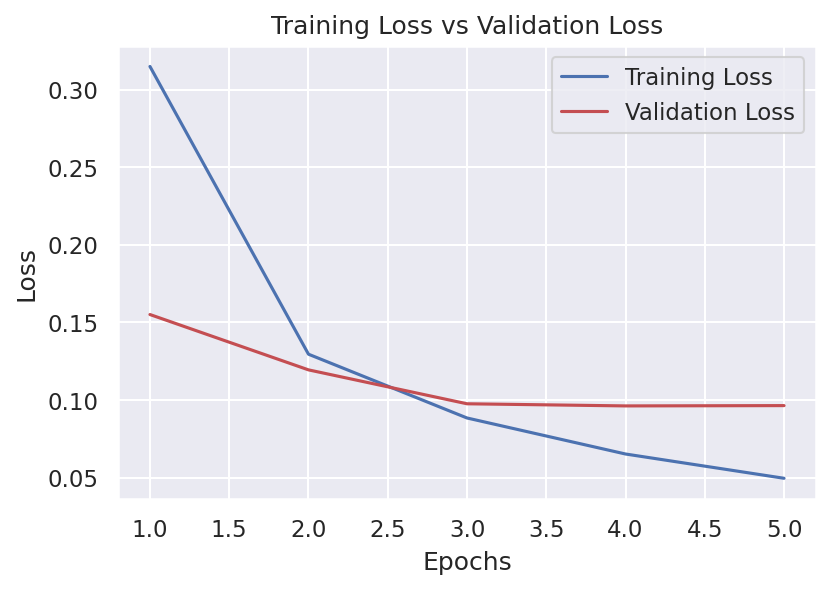

In [9]:
loss_train = report.history["loss"]
loss_validation = report.history["val_loss"]
epochs = range(1, EPOCHS + 1)
plt.figure(figsize=(6, 4), dpi=150)
plt.plot(epochs, loss_train, "b", label="Training Loss")
plt.plot(epochs, loss_validation, "r", label="Validation Loss")
plt.title("Training Loss vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Training Accuracy vs Validation Accuracy

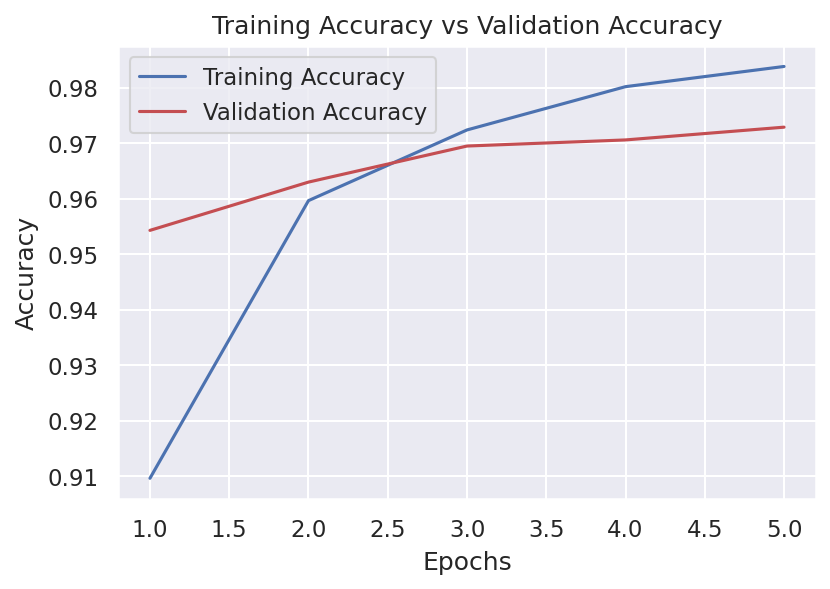

In [10]:
train_acc = report.history["accuracy"]
val_acc = report.history["val_accuracy"]
plt.figure(figsize=(6, 4), dpi=150)
plt.plot(epochs, train_acc, "b", label="Training Accuracy")
plt.plot(epochs, val_acc, "r", label="Validation Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Neural Network Visualization

In [11]:
from nnv import NNV

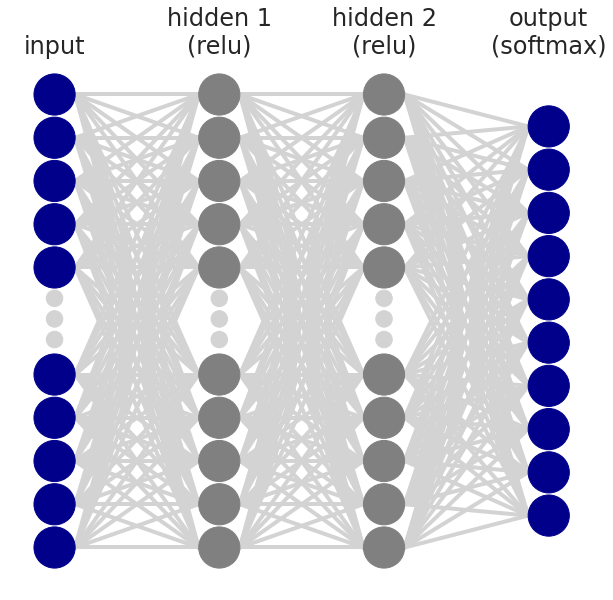

(<Figure size 14400x720 with 1 Axes>, <AxesSubplot:>)

In [12]:
plt.rcParams["figure.figsize"] = (200,10)
layers = [{"title": "input", "units": INPUT_SIZE, "color": "darkBlue"},
          {"title": "hidden 1\n(relu)", "units": HIDDEN_LAYER_SIZE},
          {"title": "hidden 2\n(relu)", "units": HIDDEN_LAYER_SIZE},
          {"title": "output\n(softmax)", "units": OUTPUT_SIZE, "color": "darkBlue"}
         ]
NNV(layers, max_num_nodes_visible=10, node_radius=10, spacing_layer=60, font_size=24).render()

# Predictions

In [13]:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)

In [14]:
SAMPLE_SIZE = 20

In [15]:
from mpl_toolkits.axes_grid1 import ImageGrid
from random import sample

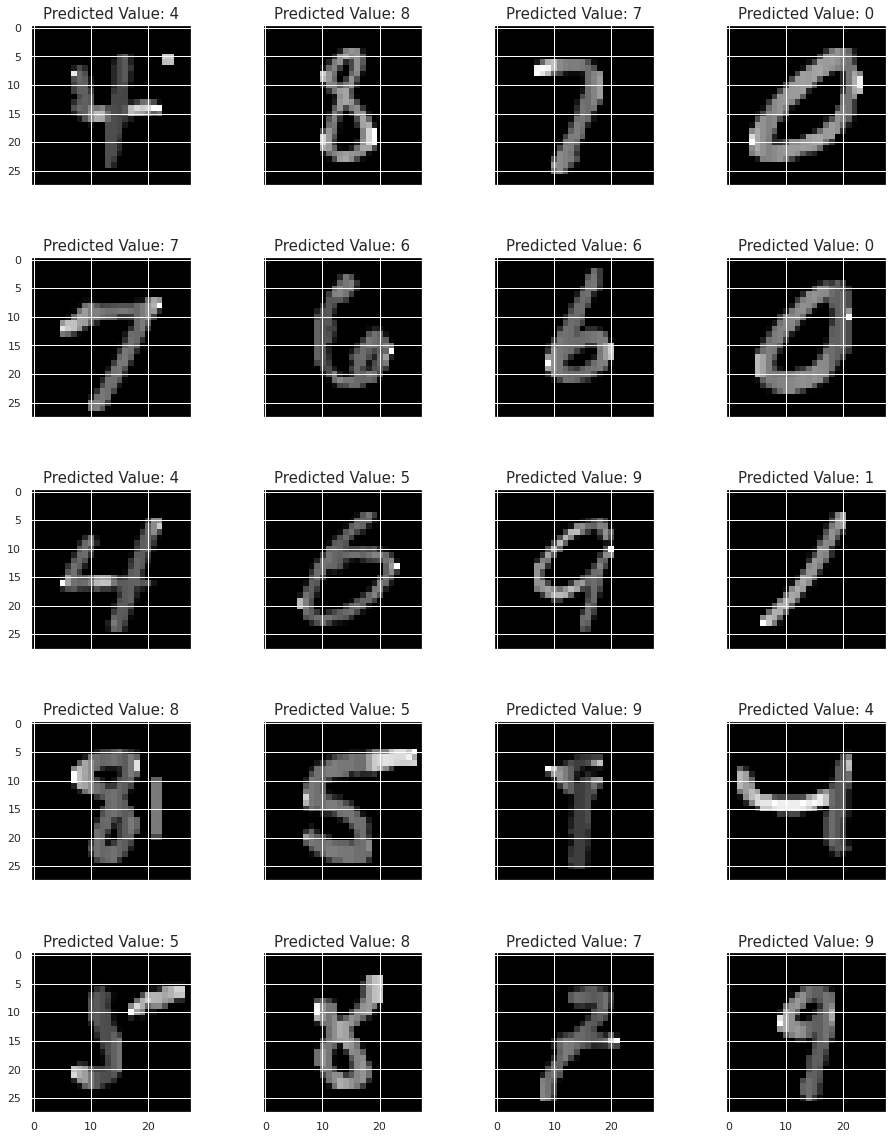

In [16]:
fig = plt.figure(figsize=(50, 20))
grid = ImageGrid(fig, 111, nrows_ncols=(5, 4), axes_pad=1)  # pad between axes in inch.
indices = sample(range(len(X_test)), SAMPLE_SIZE)
images = [X_test[idx] for idx in indices]

for ax, im, idx in zip(grid, images, indices):
    ax.set_title(f"Predicted Value: {np.argmax(predictions[idx])}", fontsize=15)
    ax.imshow(im, cmap="gray")

plt.show()

# Model Testing and Evaluation

In [17]:
test_loss, test_accuracy = model.evaluate(x=X_test, y=y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0994 - accuracy: 0.9714


In [18]:
print("Test Loss: {0:.2f}. Test accuracy: {1:.2f}%".format(test_loss, test_accuracy * 100))

Test Loss: 0.10. Test accuracy: 97.14%


## Multi Class Confusion Matrix

In [19]:
from sklearn.metrics import multilabel_confusion_matrix

In [20]:
cm = multilabel_confusion_matrix(y_test, y_pred)
labels = [f'Class {i}' for i in range(10)]

In [21]:
def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=14):
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_ylabel('True label')
    axes.set_xlabel('Predicted label')
    axes.set_title(class_label, fontsize=15)

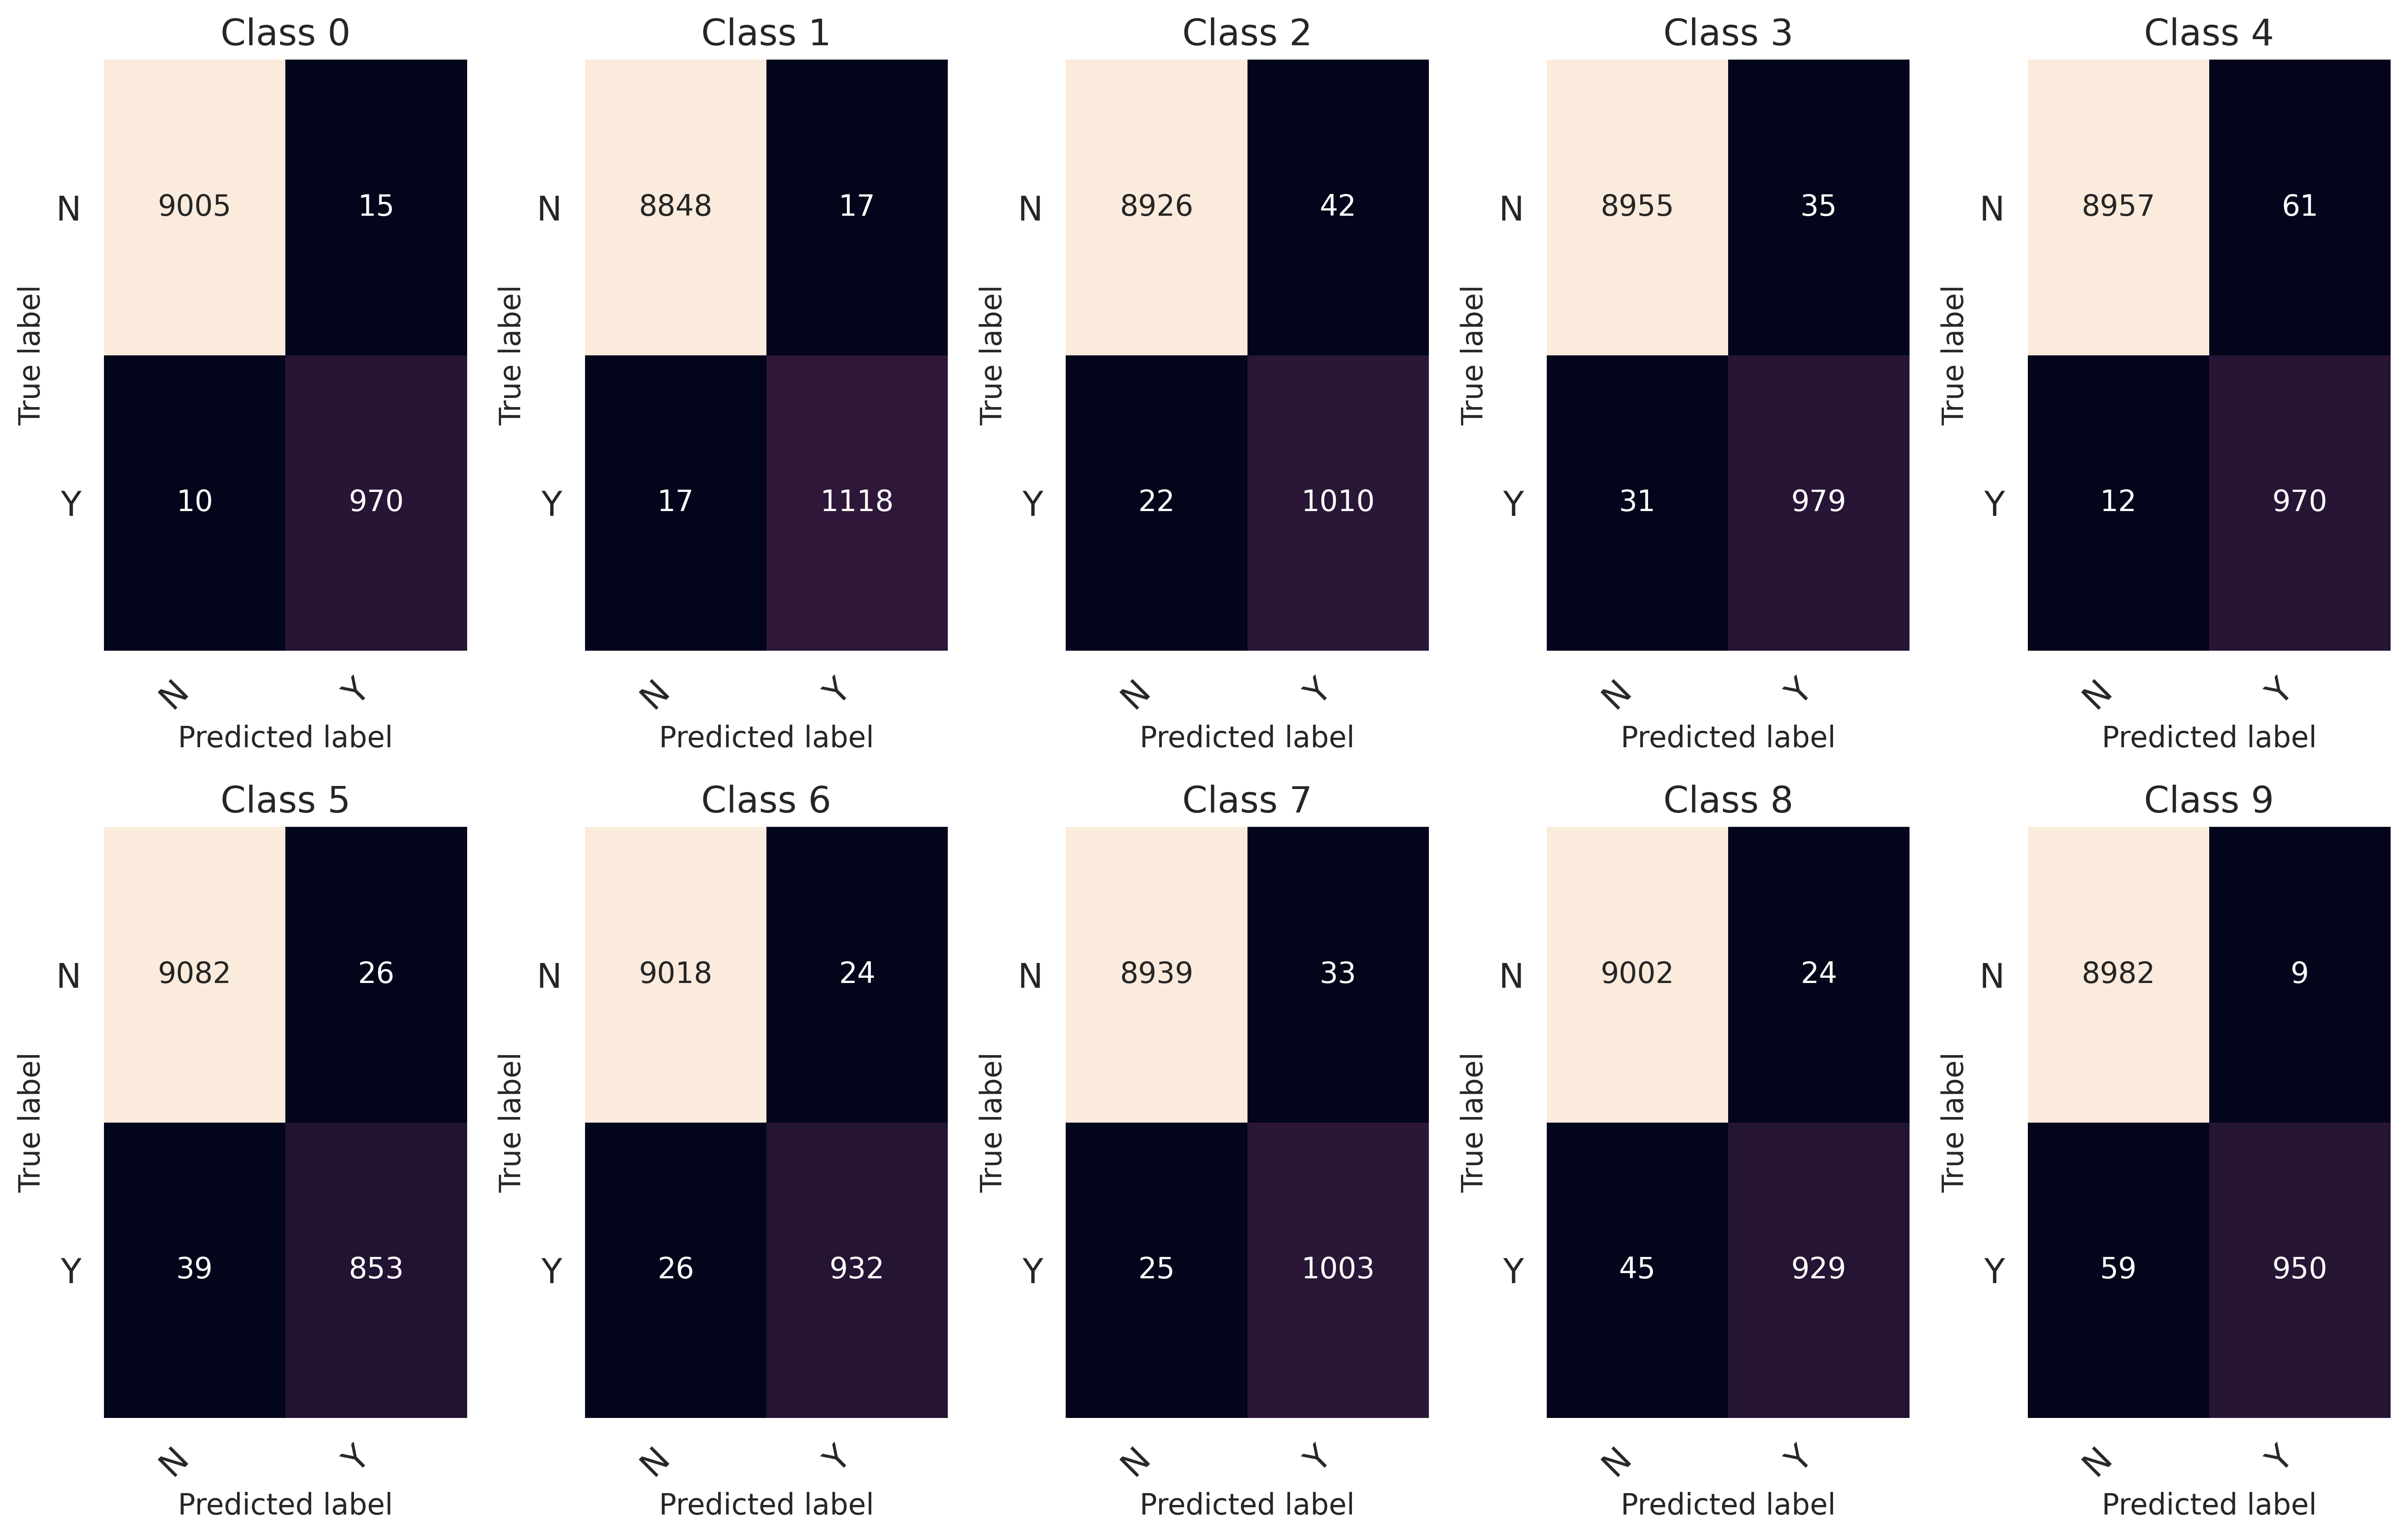

In [22]:
fig, ax = plt.subplots(2, 5, figsize=(14, 9), dpi=400)
for axes, cfs_matrix, label in zip(ax.flatten(), cm, labels):
    print_confusion_matrix(cfs_matrix, axes, label, ["N", "Y"])
fig.tight_layout()
plt.show()

## Classification Report

In [23]:
from sklearn.metrics import classification_report

In [24]:
def get_classification_report(y_test, y_pred):
    report = classification_report(y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    return df_classification_report

In [25]:
cf_report = get_classification_report(y_test, y_pred).sort_index()
cf_report # indices are the respective classes

,precision,recall,f1-score,support
0,0.984772,0.989796,0.987277,980.0000
1,0.985022,0.985022,0.985022,1135.0000
2,0.960076,0.978682,0.969290,1032.0000
3,0.965483,0.969307,0.967391,1010.0000
4,0.940834,0.987780,0.963736,982.0000
5,0.970421,0.956278,0.963298,892.0000
6,0.974895,0.972860,0.973877,958.0000
7,0.968147,0.975681,0.971899,1028.0000
8,0.974816,0.953799,0.964193,974.0000
9,0.990615,0.941526,0.965447,1009.0000
